## RESEARCH QUESTION 2

To what extent past class failures might have an impact on alcohol consumption in students?

# Best Classifiers

## Random Forest
### Train Acc= 0.8195067264573991
### Test Acc= 0.6411483253588517

## Hard Voting
### Test Acc= 0.6737668161434978
### Train Acc= 0.6363636363636364

## KNN(k=8)
### Train Acc= 0.659193
### Test Acc= 0.617225,

## Multinomial NB
### Train Acc= 0.5997757847533632
### Test Acc= 0.6028708133971292

## Decision Tree(max depth= 3)
### Train Acc= 0.6311659192825112
### Test Acc= 0.6028708133971292

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import scikitplot as skplt
from sklearn.model_selection import GridSearchCV

from sklearn import set_config
#set_config(transform_output = "pandas")

In [2]:
#conda install --channel=conda-forge scikit-learn

## Function to Save Figures

In [3]:
from pathlib import Path
IMAGES_PATH = Path() / "images/question 2"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
# Import train and test sets
X_train = pd.read_csv('smoteTrainSet.csv')
X_test = pd.read_csv('ScaledTestSet.csv')


In [5]:
X_train.columns


Index(['sex_F', 'sex_M', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A',
       'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'higher_no', 'higher_yes', 'romantic_no',
       'romantic_yes', 'age', 'Medu', 'Fedu', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'health', 'absences', 'avg_grade',
       'alc'],
      dtype='object')

## baseline classifier 0 R

In [6]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy = "most_frequent")
X = X_train.drop(columns = 'alc')
y = X_train['alc']

In [7]:
xt = X_test.drop('avg_grade',axis=1)

In [8]:
dummy.fit(X,y)

DummyClassifier(strategy='most_frequent')

### 0r classifier accuray

In [9]:
from sklearn.metrics import accuracy_score
print('Train Accuracy', accuracy_score(X_train['alc'], dummy.predict(X)))
print('Test Accuracy', accuracy_score(X_test['alc'], 
                                      dummy.predict(xt)))

Train Accuracy 0.5
Test Accuracy 0.6076555023923444


In [10]:
# Separate target from dataset
y_train = X_train['alc']
X_train = X_train[['schoolsup_yes', 'paid_yes', 'higher_yes', 'studytime', 'failures', 'absences', 'avg_grade']]
#[['schoolsup_no', 'schoolsup_yes', 'paid_no', 'paid_yes', 'higher_no', 'higher_yes', 'studytime', 'failures', 'absences', 'avg_grade']]
y_test = X_test['alc']
X_test = X_test[['schoolsup_yes', 'paid_yes', 'higher_yes', 'studytime', 'failures', 'absences', 'avg_grade']]



In [11]:
y_train

0      1.0
1      1.0
2      0.0
3      1.0
4      1.0
      ... 
887    1.0
888    1.0
889    1.0
890    1.0
891    1.0
Name: alc, Length: 892, dtype: float64

In [12]:
X_train.columns


Index(['schoolsup_yes', 'paid_yes', 'higher_yes', 'studytime', 'failures',
       'absences', 'avg_grade'],
      dtype='object')

## Finding suitable value of k for KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

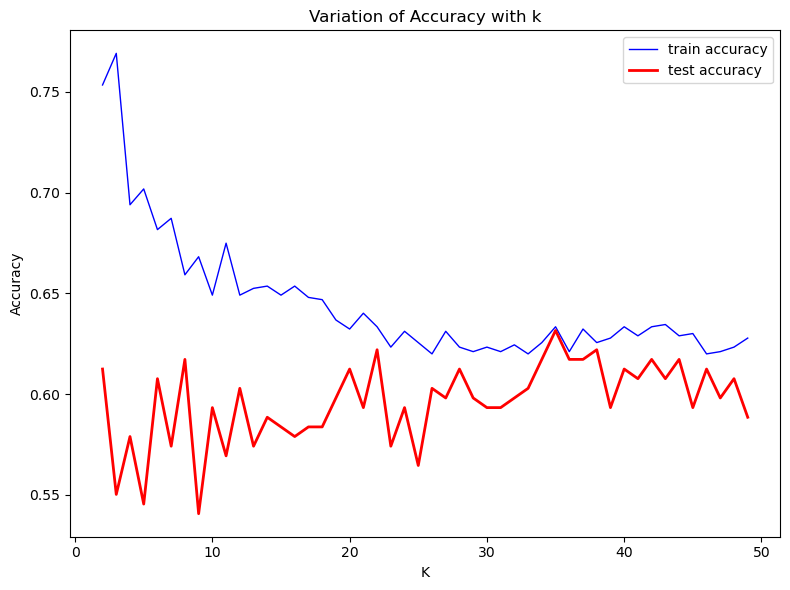

In [14]:
k = range(2, 50)
train_acc = []
test_acc = []
neighbors = []

for i in k:
    neighbors.append(i)
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, model.predict(X_train)))
    test_acc.append(accuracy_score(y_test, model.predict(X_test)))

plt.figure(figsize = (8,6))
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Variation of Accuracy with k')
plt.plot(neighbors, train_acc, color = 'blue', linewidth = 1,
         label = 'train accuracy');

plt.plot(neighbors, test_acc, color = 'red', linewidth = 2,
         label = 'test accuracy')
plt.legend()
save_fig('Accuracy against k')
plt.show();

In [15]:
pd.DataFrame({'K': neighbors, 'Train Acc': train_acc, 'Test Acc': test_acc})

K  Train Acc  Test Acc
0    2   0.753363  0.612440
1    3   0.769058  0.550239
2    4   0.693946  0.578947
3    5   0.701794  0.545455
4    6   0.681614  0.607656
5    7   0.687220  0.574163
6    8   0.659193  0.617225
7    9   0.668161  0.540670
8   10   0.649103  0.593301
9   11   0.674888  0.569378
10  12   0.649103  0.602871
11  13   0.652466  0.574163
12  14   0.653587  0.588517
13  15   0.649103  0.583732
14  16   0.653587  0.578947
15  17   0.647982  0.583732
16  18   0.646861  0.583732
17  19   0.636771  0.598086
18  20   0.632287  0.612440
19  21   0.640135  0.593301
20  22   0.633408  0.622010
21  23   0.623318  0.574163
22  24   0.631166  0.593301
23  25   0.625561  0.564593
24  26   0.619955  0.602871
25  27   0.631166  0.598086
26  28   0.623318  0.612440
27  29   0.621076  0.598086
28  30   0.623318  0.593301
29  31   0.621076  0.593301
30  32   0.624439  0.598086
31  33   0.619955  0.602871
32  34   0.625561  0.617225
33  35   0.633408  0.631579
34  36   0.621076  0.617225
35  37   0.632287  0.617225
36  38   0.625561  0.622010
37  39   0.627803  0.593301
38  40   0.633408  0.612440
39  41   0.628924  0.607656
40  42   0.633408  0.617225
41  43   0.634529  0.607656
42  44   0.628924  0.617225
43  45   0.630045  0.593301
44  46   0.619955  0.612440
45  47   0.621076  0.598086
46  48   0.623318  0.607656
47  49   0.627803  0.588517

## Applying suitable value of k in KNN Classifier

In [16]:
best_grid_knn= KNeighborsClassifier(n_neighbors=8)
best_grid_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

### Train Set

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[[345 101]
 [203 243]]
Accuracy Score 0.6591928251121076
              precision    recall  f1-score   support

         0.0     0.6296    0.7735    0.6942       446
         1.0     0.7064    0.5448    0.6152       446

    accuracy                         0.6592       892
   macro avg     0.6680    0.6592    0.6547       892
weighted avg     0.6680    0.6592    0.6547       892



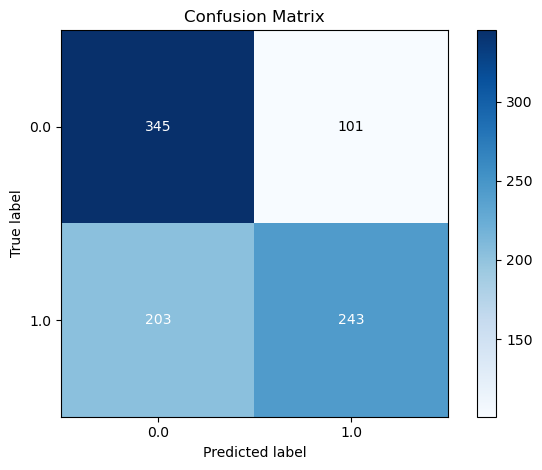

In [17]:
y_pred=best_grid_knn.predict(X_train)
print(confusion_matrix(y_train,y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred);
save_fig('Train Set Confusion Matrix for KNN hyper-para tuned q2')
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
print(classification_report(y_train,y_pred, digits=4))

### Test Set

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[[90 37]
 [43 39]]
Accuracy Score 0.6172248803827751
Classification report: 
              precision    recall  f1-score   support

         0.0     0.6767    0.7087    0.6923       127
         1.0     0.5132    0.4756    0.4937        82

    accuracy                         0.6172       209
   macro avg     0.5949    0.5921    0.5930       209
weighted avg     0.6125    0.6172    0.6144       209



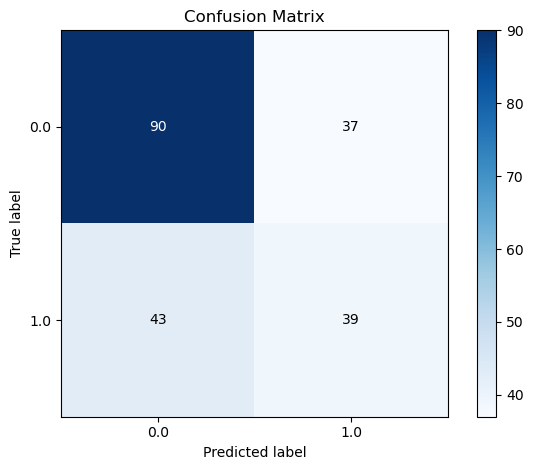

In [18]:
y_pred=best_grid_knn.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for KNN hyper-para tuned q2')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred, digits=4)))

In [19]:
pd.DataFrame(confusion_matrix(y_test, y_pred))

0   1
0  90  37
1  43  39

In [20]:
# !pip install scikit-plot


import scikitplot as skplt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print('Test Accuracy ', accuracy_score(y_test, y_pred ))

Test Accuracy  0.6172248803827751


## Hyperparameter Tuning on Decision Tree

In [21]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


In [22]:
param_grid = {
    'criterion' : ['gini'],
    'splitter' : ['best'],
    'max_depth' : range(2,4),
}

In [23]:
dt_grid = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(estimator=dt_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_dt.fit(X_train,y_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': range(2, 4),
                         'splitter': ['best']},
             verbose=2)

In [24]:
best_grid_dt = grid_search_dt.best_estimator_
best_grid_dt

DecisionTreeClassifier(max_depth=3)

## Appying best estimators on Decision Tree

[[77 50]
 [33 49]]
Accuracy Score 0.6028708133971292
Classification report: 
              precision    recall  f1-score   support

         0.0       0.70      0.61      0.65       127
         1.0       0.49      0.60      0.54        82

    accuracy                           0.60       209
   macro avg       0.60      0.60      0.60       209
weighted avg       0.62      0.60      0.61       209



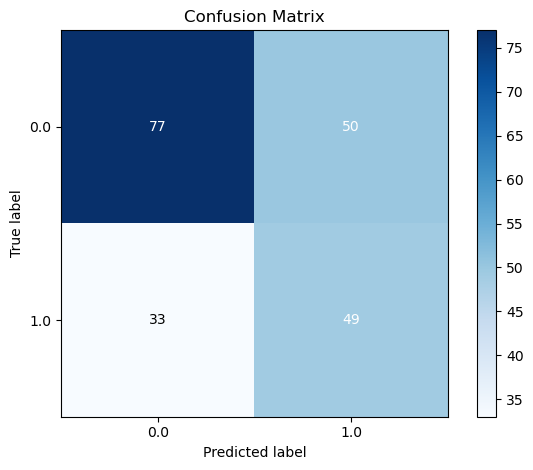

In [25]:
best_grid_dt.fit(X_train, y_train)
y_pred=best_grid_dt.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred, cmap='Blues');
save_fig('Confusion Matrix for Descision_Tree hyper-para tuned q2')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

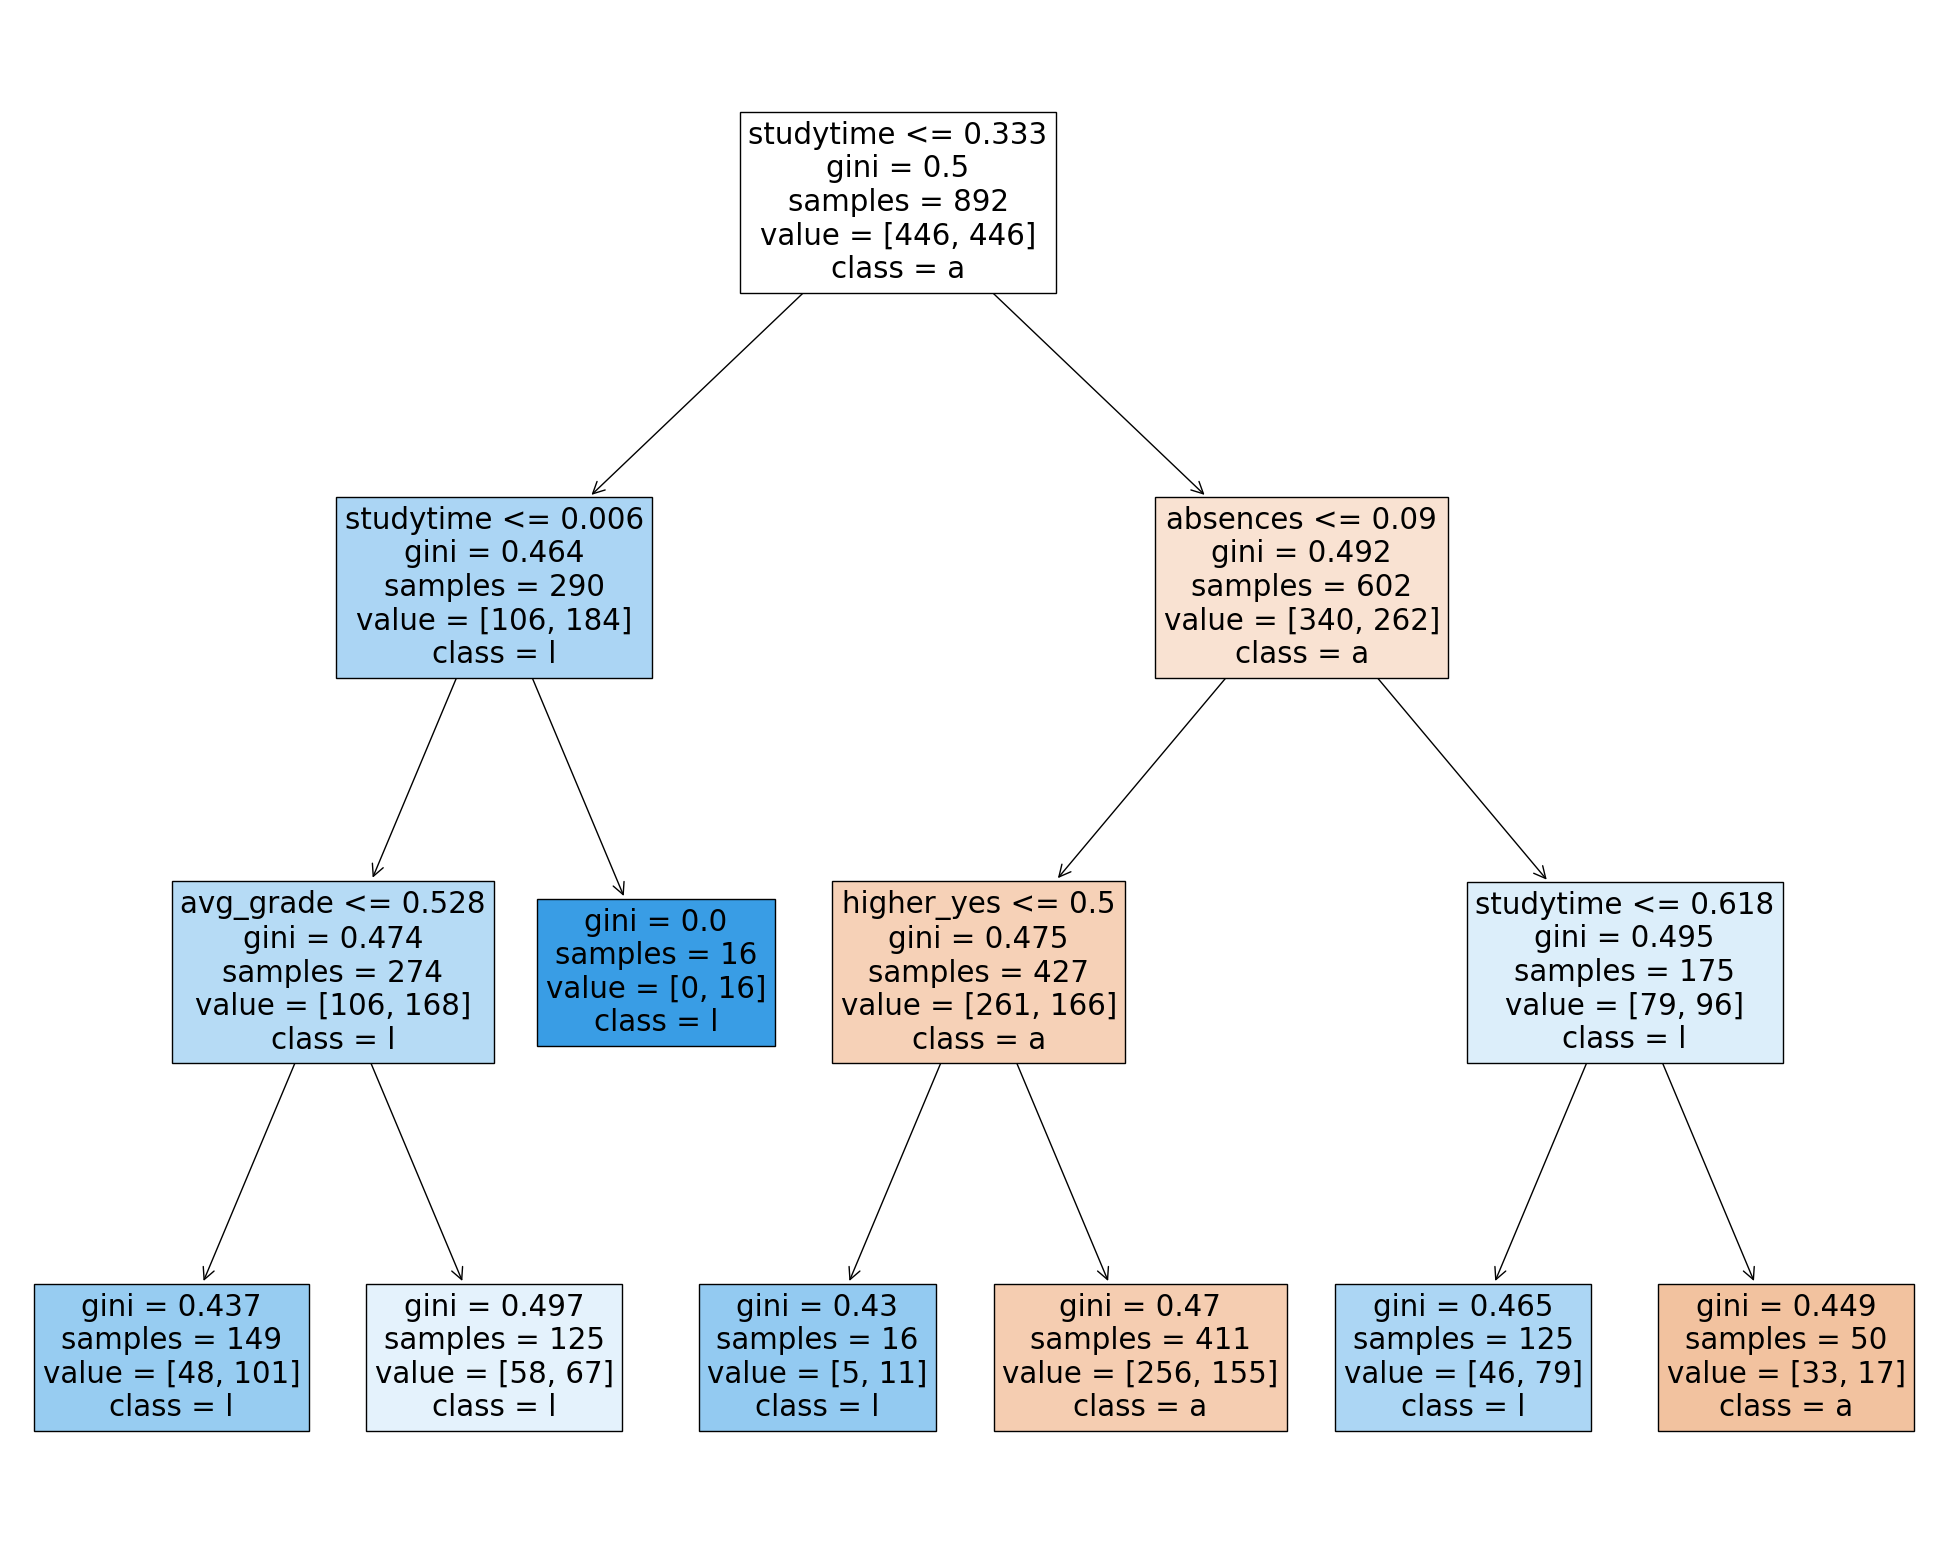

In [102]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(best_grid_dt, 
                   feature_names=X_train.columns.values.tolist(),  
                   class_names=y_train.name,
                   filled=True)

In [103]:
fig.savefig("decision_tree Q2.png")

Max Depth =  1 , Train Acc. =  0.587 , Test Acc. =  0.608
Max Depth =  2 , Train Acc. =  0.607 , Test Acc. =  0.598
Max Depth =  3 , Train Acc. =  0.631 , Test Acc. =  0.603
Max Depth =  4 , Train Acc. =  0.633 , Test Acc. =  0.632
Max Depth =  5 , Train Acc. =  0.661 , Test Acc. =  0.603
Max Depth =  6 , Train Acc. =  0.692 , Test Acc. =  0.627
Max Depth =  7 , Train Acc. =  0.719 , Test Acc. =  0.612
Max Depth =  8 , Train Acc. =  0.737 , Test Acc. =  0.589
Max Depth =  9 , Train Acc. =  0.754 , Test Acc. =  0.593
Max Depth =  10 , Train Acc. =  0.776 , Test Acc. =  0.589
Max Depth =  11 , Train Acc. =  0.79 , Test Acc. =  0.612
Max Depth =  12 , Train Acc. =  0.823 , Test Acc. =  0.593
Max Depth =  13 , Train Acc. =  0.841 , Test Acc. =  0.589
Max Depth =  14 , Train Acc. =  0.851 , Test Acc. =  0.574
Max Depth =  15 , Train Acc. =  0.87 , Test Acc. =  0.545
Max Depth =  16 , Train Acc. =  0.886 , Test Acc. =  0.579
Max Depth =  17 , Train Acc. =  0.891 , Test Acc. =  0.574
Max Dept

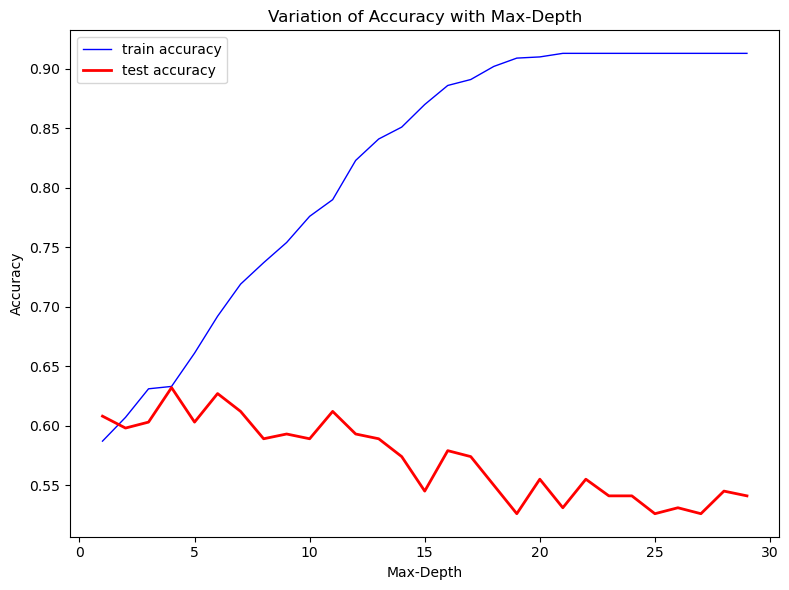

In [28]:
train_acc = []
test_acc = []
max_depth =[]

for depth in range(1, 30):
    clf = DecisionTreeClassifier(max_depth = depth, criterion='gini')
    clf.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, clf.predict(X_train)).round(3))
    test_acc.append(accuracy_score(y_test, clf.predict(X_test)).round(3))
    max_depth.append(depth)

for i in range(1, 30):
    print('Max Depth = ', i, ', Train Acc. = ', train_acc[i-1], ', Test Acc. = ' ,
         test_acc[i-1])

plt.figure(figsize = (8,6))
plt.xlabel('Max-Depth')
plt.ylabel('Accuracy')
plt.title('Variation of Accuracy with Max-Depth')
plt.plot(max_depth, train_acc, color = 'blue', linewidth = 1,
         label = 'train accuracy');

plt.plot(max_depth, test_acc, color = 'red', linewidth = 2,
         label = 'test accuracy')
plt.legend()
save_fig('Accuracy against max_depth')
plt.show();

Confusion Matrix for Train Set


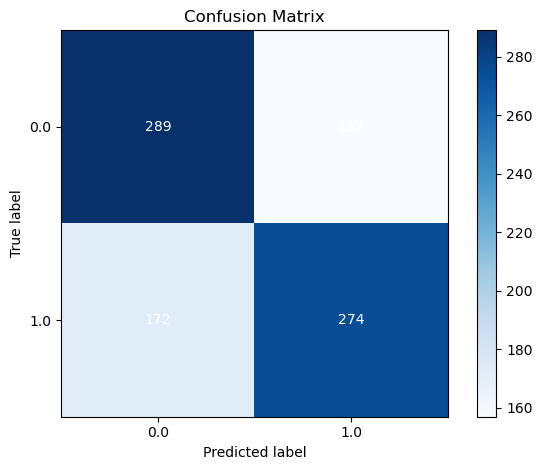

In [29]:
# Confusion matrix for train set
print("Confusion Matrix for Train Set")
y_pred = best_grid_dt.predict(X_train)
pd. DataFrame (confusion_matrix(y_train, y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred, cmap='Blues');
save_fig('Confusion Matrix for Descision_Tree hyper-para tuned q2')

In [30]:
# Confusion matrix for test set
print("Confusion Matrix for Test Set")
pd. DataFrame (confusion_matrix(y_test, best_grid_dt.predict(X_test)))


Confusion Matrix for Test Set


0   1
0  77  50
1  33  49

In [31]:
print("Classification Report for Train Set")
print(classification_report (y_train, best_grid_dt.predict(X_train).round (3)))
print("Accuracy Score {}".format(accuracy_score(y_train,best_grid_dt.predict(X_train))))

Classification Report for Train Set
              precision    recall  f1-score   support

         0.0       0.63      0.65      0.64       446
         1.0       0.64      0.61      0.62       446

    accuracy                           0.63       892
   macro avg       0.63      0.63      0.63       892
weighted avg       0.63      0.63      0.63       892

Accuracy Score 0.6311659192825112


In [32]:
print("Classification Report for Test Set")
print(classification_report(y_test, best_grid_dt.predict (X_test). round(3)))
print("Accuracy Score {}".format(accuracy_score(y_test,best_grid_dt.predict(X_test))))

Classification Report for Test Set
              precision    recall  f1-score   support

         0.0       0.70      0.61      0.65       127
         1.0       0.49      0.60      0.54        82

    accuracy                           0.60       209
   macro avg       0.60      0.60      0.60       209
weighted avg       0.62      0.60      0.61       209

Accuracy Score 0.6028708133971292


## Hyperparameter Tuning on Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
param_grid= {
    'n_estimators': [10, 50, 100, 500],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 30, 100],
    'max_features': [None, 'sqrt', 'log2']
}

In [35]:
rf_grid = RandomForestClassifier()
grid_search_rf = GridSearchCV(estimator=rf_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_rf.fit(X_train,y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
480 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/job

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 30, 100],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100, 500]},
             verbose=2)

In [36]:
# Finding out the best estimator
best_grid_rf = grid_search_rf.best_estimator_
best_grid_rf

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt')

In [37]:
best_grid_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt')

### Train Set

[[377  69]
 [ 92 354]]
Accuracy Score 0.8195067264573991
Classification report: 
              precision    recall  f1-score   support

         0.0      0.804     0.845     0.824       446
         1.0      0.837     0.794     0.815       446

    accuracy                          0.820       892
   macro avg      0.820     0.820     0.819       892
weighted avg      0.820     0.820     0.819       892



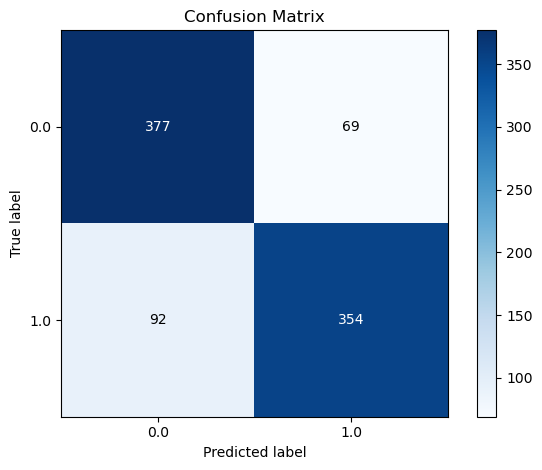

In [38]:
y_pred=best_grid_rf.predict(X_train)
print(confusion_matrix(y_train,y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred, cmap='Blues');
save_fig('Train Set Confusion Matrix for Random Forest hyper-para tuned q2')
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
print("Classification report: \n{}".format(classification_report(y_train,y_pred,digits=3)))

### Test Set

In [39]:
y_pred = best_grid_rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred,digits=3)))

[[86 41]
 [34 48]]
Accuracy Score 0.6411483253588517
Classification report: 
              precision    recall  f1-score   support

         0.0      0.717     0.677     0.696       127
         1.0      0.539     0.585     0.561        82

    accuracy                          0.641       209
   macro avg      0.628     0.631     0.629       209
weighted avg      0.647     0.641     0.643       209



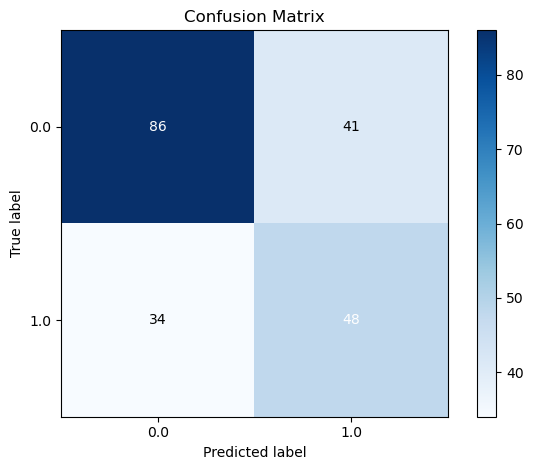

In [40]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for Random forest hyper-para tuned q2')

## Hyperparameter Tuning on Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
param_grid = {
    'penalty' : ['l1', 'l2', 'elasticnet', None],
    'random_state' : ['42', None],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

In [43]:
lr_grid = LogisticRegression()
grid_search_lr = GridSearchCV(estimator=lr_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_lr.fit(X_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV] END .........criterion=gini, max_depth=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=500; total time=   1.5s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=500; total time=   1.5s
[CV] END criterion=gini, max_depth=None, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=log2, n_estimators=10; total tim

[CV] END .........criterion=gini, max_depth=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
410 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aymanibnehakim/opt/anaco

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', None],
                         'random_state': ['42', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             verbose=2)

In [44]:
# Finding out the best estimator
best_grid_lr = grid_search_lr.best_estimator_
best_grid_lr

LogisticRegression(penalty='l1', solver='liblinear')

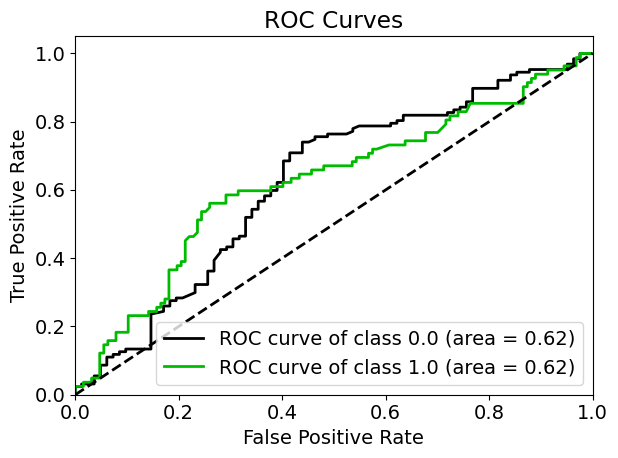

In [101]:
y_probas = best_grid_rf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro = False, plot_macro = False)
save_fig('ROC Curve-Random Forest Q2')
plt.show();

# Applying the best grid for logistic regression

In [45]:
best_grid_lr.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

### Train Set

[[265 181]
 [167 279]]
Accuracy Score 0.6098654708520179
Classification report: 
              precision    recall  f1-score   support

         0.0       0.61      0.59      0.60       446
         1.0       0.61      0.63      0.62       446

    accuracy                           0.61       892
   macro avg       0.61      0.61      0.61       892
weighted avg       0.61      0.61      0.61       892



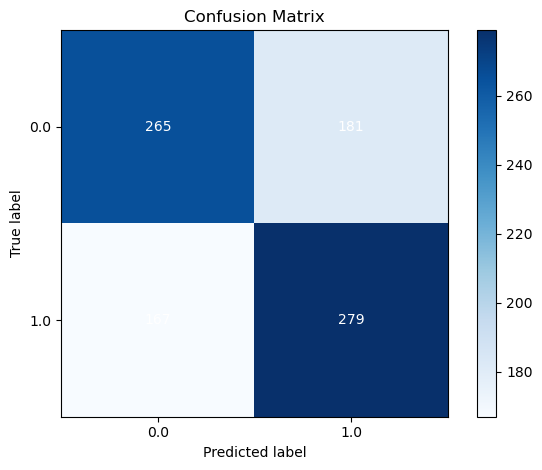

In [46]:
y_pred=best_grid_lr.predict(X_train)
print(confusion_matrix(y_train,y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred);
save_fig('Train Set Confusion Matrix for Logistic Regression hyper-para tuned q2')
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
print("Classification report: \n{}".format(classification_report(y_train,y_pred)))

### Test Set

[[78 49]
 [31 51]]
Accuracy Score 0.6172248803827751
Classification report: 
              precision    recall  f1-score   support

         0.0       0.72      0.61      0.66       127
         1.0       0.51      0.62      0.56        82

    accuracy                           0.62       209
   macro avg       0.61      0.62      0.61       209
weighted avg       0.63      0.62      0.62       209



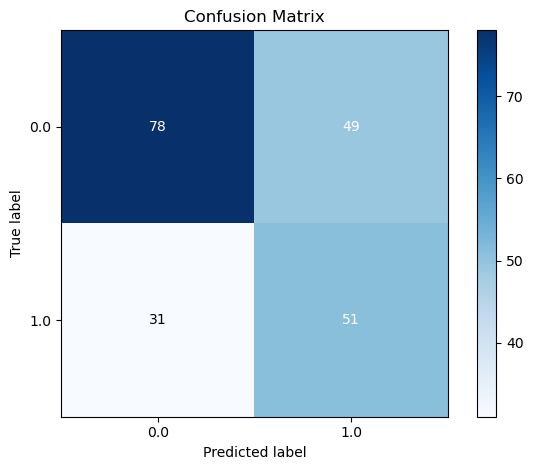

In [47]:
y_pred=best_grid_lr.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for Logistic Regression hyper-para tuned q2')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

## Hyperparameter Tuning on SVM

In [48]:
from sklearn.svm import SVC

In [49]:
param_grid = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'random_state' : [42, None],
    'gamma' : ['scale', 'auto'],
    'shrinking' : [True, False],
    'probability' : [True, False],
    'break_ties' : [True, False]
}

In [50]:
svc_grid = SVC()
grid_search_svc = GridSearchCV(estimator=svc_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_svc.fit(X_train,y_train)

Fitting 10 folds for each of 128 candidates, totalling 1280 fits
[CV] END .........criterion=gini, max_depth=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=500; total time=   1.5s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=500; total time=   1.8s
[CV] END criterion=gini, max_depth=None, max_features=log2, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=None, max_features=log2, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=None, max_features=log2, n_estimators=50; total

[CV] END .........criterion=gini, max_depth=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=500; total time=   1.4s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=500; total time=   1.6s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=500; total time=   1.6s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=500; total time=   1.8s
[CV] END criterion=gini, max_depth=None, max_features=log2, n_estimators=500; total time=   1.4s
[CV] END criterion=gini, max_depth=10, max_features=None, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=10, max_features=None, n_estimators=500; total time=   1.8s
[CV] END criterion=gini, max_depth=10, max_features=

[CV] END .........criterion=gini, max_depth=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=500; total time=   1.5s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=500; total time=   1.5s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=500; total time=   1.7s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=500; total time=   1.9s
[CV] END criterion=gini, max_depth=None, max_features=log2, n_estimators=500; total time=   1.5s
[CV] END criterion=gini, max_depth=10, max_features=None, n_estimators=500; total time=   1.7s
[CV] END criterion=gini, max_depth=10, max_features

[CV] END .........criterion=gini, max_depth=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features

[CV] END .........criterion=gini, max_depth=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=500; total time=   1.5s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=500; total time=   1.6s
[CV] END criterion=gini, max_depth=None, max_features=log2, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=None, max_features=log2, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=None, max_features=log2, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=None, max_featur

[CV] END criterion=entropy, max_depth=100, max_features=log2, n_estimators=500; total time=   3.5s
[CV] END criterion=log_loss, max_depth=None, max_features=None, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=None, max_features=None, n_estimators=50; total time=   0.1s
[CV] END criterion=log_loss, max_depth=None, max_features=None, n_estimators=100; total time=   0.1s
[CV] END criterion=log_loss, max_depth=None, max_features=None, n_estimators=100; total time=   0.1s
[CV] END criterion=log_loss, max_depth=None, max_features=None, n_estimators=500; total time=   0.5s
[CV] END criterion=log_loss, max_depth=None, max_features=None, n_estimators=500; total time=   0.7s
[CV] END criterion=log_loss, max_depth=None, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END criterion=log_loss, max_depth=None, max_features=sqrt, n_estimators=500; total time=   0.7s
[CV] END criterion=log_loss, max_depth=None, max_features=sqrt, n_estimators=500; total time=  

[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=500; total time=   0.6s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=500; total time=   0.4s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=500; total time=   0.4s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END crite

[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=500; total time=   0.6s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=500; total time=   0.5s
[CV] END criterion=log_loss, max_depth=30, max_features=None, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=None, n_estimators=50; total time=   0.1s
[CV] END criteri

[CV] END criterion=log_loss, max_depth=100, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END criterion=log_loss, max_depth=100, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END criterion=log_loss, max_depth=100, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END criterion=log_loss, max_depth=100, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END criterion=log_loss, max_depth=100, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=log_loss, max_depth=100, max_features=sqrt, n_estimators=500; total time=   0.7s
[CV] END criterion=log_loss, max_depth=100, max_features=sqrt, n_estimators=500; total time=   0.5s
[CV] END criterion=log_loss, max_depth=100, max_features=log2, n_estimators=500; total time=   0.5s
[CV] END criterion=log_loss, max_depth=100, max_features=log2, n_estimators=500; total time=   0.4s
[CV] END ......penalty=l1, random_state=42, solver=liblinear; total time=   0.0s
[CV] END ......penalty

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'break_ties': [True, False],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'probability': [True, False],
                         'random_state': [42, None],
                         'shrinking': [True, False]},
             verbose=2)

In [51]:
best_grid_svc = grid_search_svc.best_estimator_
best_grid_svc

SVC(break_ties=True, kernel='linear', probability=True, random_state=42)

# Applying the best grid for SVM

In [52]:
best_grid_svc.fit(X_train, y_train)

SVC(break_ties=True, kernel='linear', probability=True, random_state=42)

### Train Set

[[266 180]
 [160 286]]
Accuracy Score 0.6188340807174888
Classification report: 
              precision    recall  f1-score   support

         0.0       0.62      0.60      0.61       446
         1.0       0.61      0.64      0.63       446

    accuracy                           0.62       892
   macro avg       0.62      0.62      0.62       892
weighted avg       0.62      0.62      0.62       892



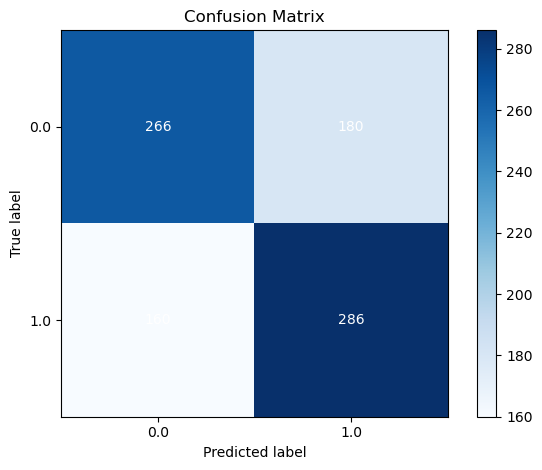

In [53]:
y_pred=best_grid_svc.predict(X_train)
print(confusion_matrix(y_train,y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred);
save_fig('Train Set Confusion Matrix for SVM hyper-para tuned q2')
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
print("Classification report: \n{}".format(classification_report(y_train,y_pred)))

### Test Set

[[73 54]
 [32 50]]
Accuracy Score 0.5885167464114832
Classification report: 
              precision    recall  f1-score   support

         0.0       0.70      0.57      0.63       127
         1.0       0.48      0.61      0.54        82

    accuracy                           0.59       209
   macro avg       0.59      0.59      0.58       209
weighted avg       0.61      0.59      0.59       209



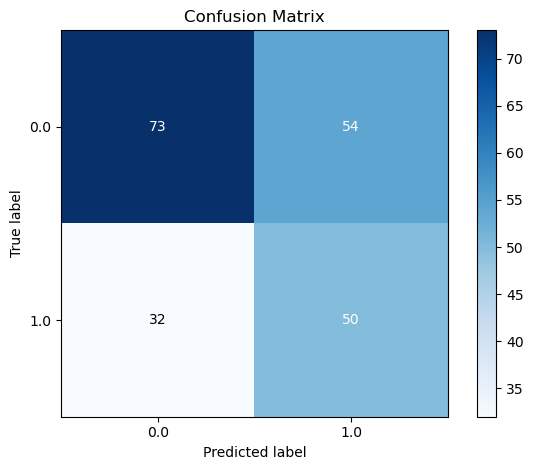

In [54]:
best_grid_svc.fit(X_train, y_train)
y_pred=best_grid_svc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for SVM hyper-para tuned q2')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

## Hyperparameter Tuning on Multinomial Naive Bayes

In [55]:
from  sklearn.naive_bayes import MultinomialNB

In [56]:
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
    'fit_prior': [True, False]
}

In [57]:
nb_grid = MultinomialNB()
grid_search_nb = GridSearchCV(estimator=nb_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_nb.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END ..........penalty=l1, random_state=42, solver=lbfgs; total time=   0.0s
[CV] END ..........penalty=l1, random_state=42, solver=lbfgs; total time=   0.0s
[CV] END ......penalty=l1, random_state=42, solver=liblinear; total time=   0.0s
[CV] END ......penalty=l1, random_state=42, solver=liblinear; total time=   0.0s
[CV] END ......penalty=l1, random_state=42, solver=liblinear; total time=   0.0s
[CV] END penalty=l1, random_state=42, solver=newton-cholesky; total time=   0.0s
[CV] END penalty=l1, random_state=42, solver=newton-cholesky; total time=   0.0s
[CV] END penalty=l1, random_state=42, solver=newton-cholesky; total time=   0.0s
[CV] END penalty=l1, random_state=42, solver=newton-cholesky; total time=   0.0s
[CV] END ............penalty=l1, random_state=42, solver=sag; total time=   0.0s
[CV] END ............penalty=l1, random_state=42, solver=sag; total time=   0.0s
[CV] END penalty=l2, random_state=42, solver=n

[CV] END penalty=elasticnet, random_state=None, solver=newton-cg; total time=   0.0s
[CV] END penalty=elasticnet, random_state=None, solver=newton-cg; total time=   0.0s
[CV] END penalty=elasticnet, random_state=None, solver=newton-cg; total time=   0.0s
[CV] END penalty=elasticnet, random_state=None, solver=newton-cg; total time=   0.0s
[CV] END penalty=elasticnet, random_state=None, solver=newton-cholesky; total time=   0.0s
[CV] END penalty=elasticnet, random_state=None, solver=newton-cholesky; total time=   0.0s
[CV] END penalty=elasticnet, random_state=None, solver=newton-cholesky; total time=   0.0s
[CV] END penalty=elasticnet, random_state=None, solver=newton-cholesky; total time=   0.0s
[CV] END penalty=elasticnet, random_state=None, solver=newton-cholesky; total time=   0.0s
[CV] END penalty=elasticnet, random_state=None, solver=newton-cholesky; total time=   0.0s
[CV] END .........penalty=None, random_state=42, solver=saga; total time=   0.0s
[CV] END ......penalty=None, rand

GridSearchCV(cv=10, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
                         'fit_prior': [True, False]},
             verbose=2)

In [58]:
best_grid_nb = grid_search_nb.best_estimator_
best_grid_nb

MultinomialNB()

In [59]:
# Applying the best grid for Multinomial Naive Bayes
best_grid_nb.fit(X_train, y_train)

MultinomialNB()

### Train Set

[[310 136]
 [221 225]]
Accuracy Score 0.5997757847533632
Classification report: 
              precision    recall  f1-score   support

         0.0      0.584     0.695     0.635       446
         1.0      0.623     0.504     0.558       446

    accuracy                          0.600       892
   macro avg      0.604     0.600     0.596       892
weighted avg      0.604     0.600     0.596       892



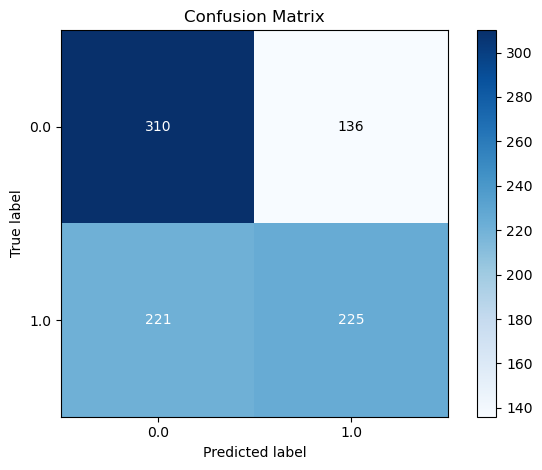

In [60]:
y_pred=best_grid_nb.predict(X_train)
print(confusion_matrix(y_train,y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred);
save_fig('Train Set Confusion Matrix for Multinomial NB hyper-para tuned q2')
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
print("Classification report: \n{}".format(classification_report(y_train,y_pred,digits=3)))

### Test Set

[[90 37]
 [46 36]]
Accuracy Score 0.6028708133971292
Classification report: 
              precision    recall  f1-score   support

         0.0      0.662     0.709     0.684       127
         1.0      0.493     0.439     0.465        82

    accuracy                          0.603       209
   macro avg      0.577     0.574     0.574       209
weighted avg      0.596     0.603     0.598       209



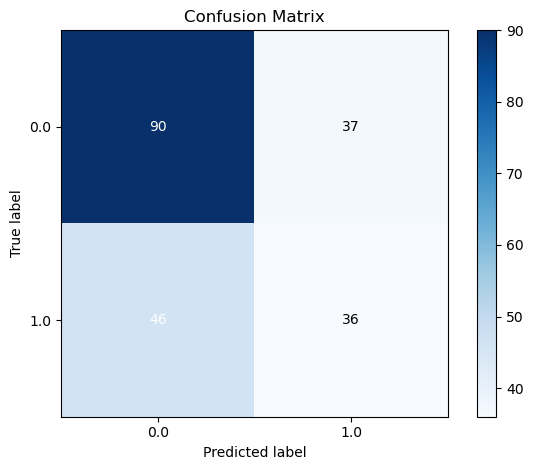

In [61]:

y_pred=best_grid_nb.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for test set MultinomialNB hyper-para tuned q2')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred,digits=3)))


## ensemble learning

In [62]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## Hard voting classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

hard_voting_clf = VotingClassifier(
    estimators=[
        ('knn', best_grid_knn),
        ('dt', best_grid_dt),
        ('lr', best_grid_lr),
        ('rf', best_grid_rf),
        ('svc', best_grid_svc),
        ('nb', best_grid_nb)
    ], 
    voting = 'hard'
)
hard_voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=8)),
                             ('dt', DecisionTreeClassifier(max_depth=3)),
                             ('lr',
                              LogisticRegression(penalty='l1',
                                                 solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=10,
                                                     max_features='sqrt')),
                             ('svc',
                              SVC(break_ties=True, kernel='linear',
                                  probability=True, random_state=42)),
                             ('nb', MultinomialNB())])

In [64]:
from sklearn.metrics import accuracy_score
for clf in [best_grid_knn, best_grid_dt, best_grid_lr, best_grid_rf, best_grid_svc, best_grid_nb, hard_voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier 0.6172248803827751
DecisionTreeClassifier 0.6028708133971292
LogisticRegression 0.6172248803827751
RandomForestClassifier 0.6028708133971292
SVC 0.5885167464114832
MultinomialNB 0.6028708133971292
VotingClassifier 0.6363636363636364


/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Train Set

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

Accuracy Score 0.6737668161434978
Classification report: 
              precision    recall  f1-score   support

         0.0       0.66      0.73      0.69       446
         1.0       0.70      0.62      0.65       446

    accuracy                           0.67       892
   macro avg       0.68      0.67      0.67       892
weighted avg       0.68      0.67      0.67       892



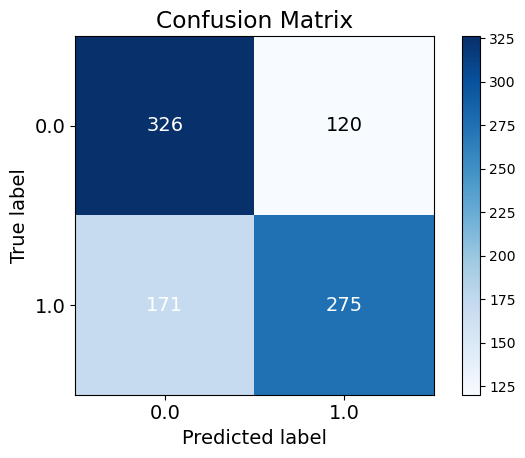

In [65]:
skplt.metrics.plot_confusion_matrix(y_train, hard_voting_clf.predict(X_train));
save_fig('Train Set Confusion Matrix for Ensemble Hard Voting q2')
print("Accuracy Score {}".format(accuracy_score(y_train, hard_voting_clf.predict(X_train))))
print("Classification report: \n{}".format(classification_report(y_train, hard_voting_clf.predict(X_train))))

### Test Set

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy Score 0.6363636363636364
Classification report: 
              precision    recall  f1-score   support

         0.0       0.70      0.69      0.70       127
         1.0       0.54      0.55      0.54        82

    accuracy                           0.64       209
   macro avg       0.62      0.62      0.62       209
weighted avg       0.64      0.64      0.64       209



/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

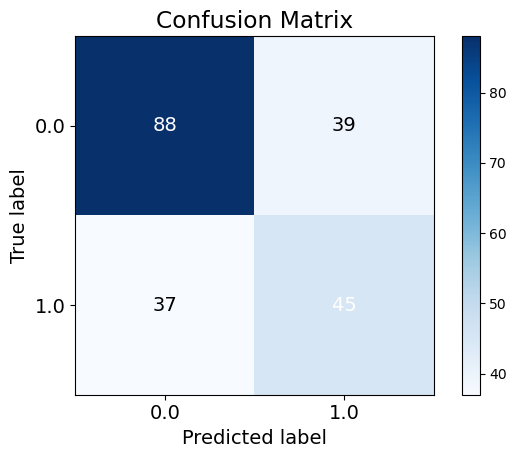

In [66]:
skplt.metrics.plot_confusion_matrix(y_test, hard_voting_clf.predict(X_test));
save_fig('Test Set Confusion Matrix for Ensemble Hard Voting q2')
print("Accuracy Score {}".format(accuracy_score(y_test, hard_voting_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, hard_voting_clf.predict(X_test))))

## Soft voting classifier

In [67]:
soft_voting_clf = VotingClassifier(
    estimators=[
        ('knn', best_grid_knn),
        ('dt', best_grid_dt),
        ('lr', best_grid_lr),
        ('rf', best_grid_rf),
        ('svc', best_grid_svc),
        ('nb', best_grid_nb)
    ], 
    voting = 'soft'
)
soft_voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=8)),
                             ('dt', DecisionTreeClassifier(max_depth=3)),
                             ('lr',
                              LogisticRegression(penalty='l1',
                                                 solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=10,
                                                     max_features='sqrt')),
                             ('svc',
                              SVC(break_ties=True, kernel='linear',
                                  probability=True, random_state=42)),
                             ('nb', MultinomialNB())],
                 voting='soft')

In [68]:
from sklearn.metrics import accuracy_score
for clf in [best_grid_knn, best_grid_dt, best_grid_lr, best_grid_rf, best_grid_svc, best_grid_nb, soft_voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier 0.6172248803827751
DecisionTreeClassifier 0.6028708133971292
LogisticRegression 0.6172248803827751
RandomForestClassifier 0.6220095693779905
SVC 0.5885167464114832
MultinomialNB 0.6028708133971292
VotingClassifier 0.6267942583732058


### Train Set

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

Accuracy Score 0.6737668161434978
Classification report: 
              precision    recall  f1-score   support

         0.0      0.656     0.731     0.691       446
         1.0      0.696     0.617     0.654       446

    accuracy                          0.674       892
   macro avg      0.676     0.674     0.673       892
weighted avg      0.676     0.674     0.673       892



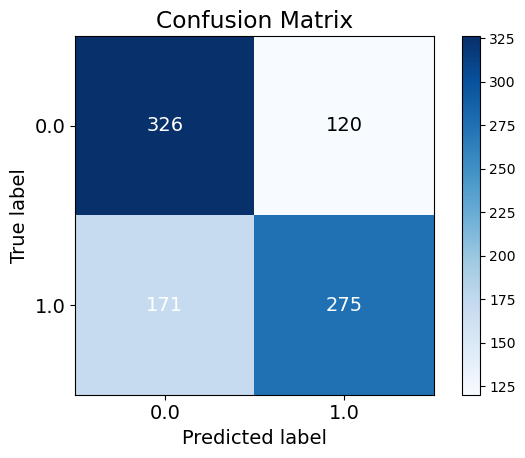

In [69]:
skplt.metrics.plot_confusion_matrix(y_train, hard_voting_clf.predict(X_train));
save_fig('Train Set Confusion Matrix for Ensemble Soft Voting q2')
print("Accuracy Score {}".format(accuracy_score(y_train, hard_voting_clf.predict(X_train))))
print("Classification report: \n{}".format(classification_report(y_train, hard_voting_clf.predict(X_train),digits=3)))

### Test Set

Accuracy Score 0.6267942583732058
Classification report: 
              precision    recall  f1-score   support

         0.0      0.721     0.630     0.672       127
         1.0      0.520     0.622     0.567        82

    accuracy                          0.627       209
   macro avg      0.621     0.626     0.619       209
weighted avg      0.642     0.627     0.631       209



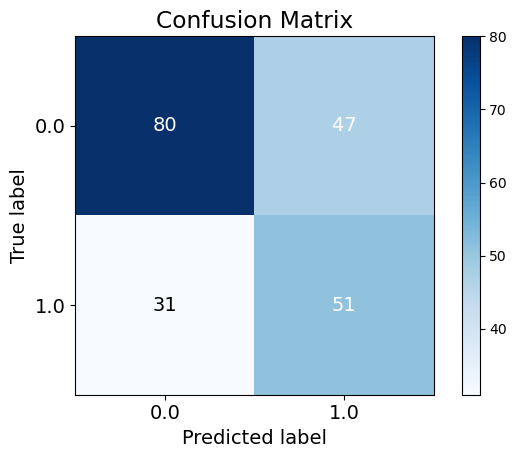

In [70]:
skplt.metrics.plot_confusion_matrix(y_test, soft_voting_clf.predict(X_test));
save_fig('Confusion Matrix for Ensemble Soft Voting q2')
print("Accuracy Score {}".format(accuracy_score(y_test, soft_voting_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, soft_voting_clf.predict(X_test),digits=3)))

## bagging and pasting

In [71]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            max_samples=100, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, random_state=42)

## out of bag evaluation

In [72]:
bag_clf = BaggingClassifier(best_grid_dt, n_estimators=500,
                            oob_score=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
print('OOB Score', bag_clf.oob_score_)

y_pred = bag_clf.predict(X_test)
print('Test Accuracy', accuracy_score(y_test, y_pred))

OOB Score 0.600896860986547
Test Accuracy 0.6220095693779905


Accuracy Score 0.6220095693779905
Classification report: 
              precision    recall  f1-score   support

         0.0       0.70      0.65      0.68       127
         1.0       0.52      0.57      0.54        82

    accuracy                           0.62       209
   macro avg       0.61      0.61      0.61       209
weighted avg       0.63      0.62      0.62       209



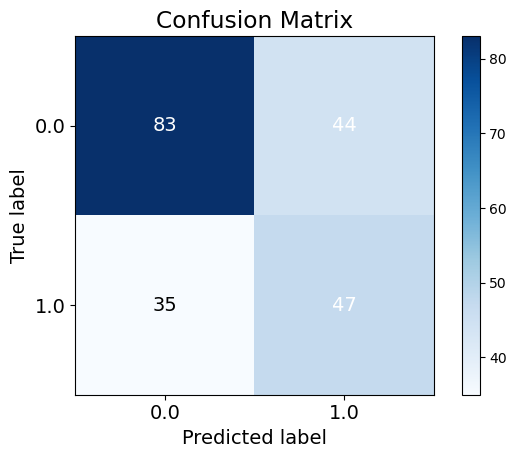

In [73]:
skplt.metrics.plot_confusion_matrix(y_test, bag_clf.predict(X_test));
save_fig('Confusion Matrix for Out of bag q2')
print("Accuracy Score {}".format(accuracy_score(y_test, bag_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, bag_clf.predict(X_test))))

## impact of no. of estimators

In [74]:
import numpy as np
est = range(50, 500, 50)
train_acc = []
test_acc = []
oob_acc = []
estim = []
out = []
for num_est in est:
    estim.append(num_est)
    rnd_clf = RandomForestClassifier(n_estimators=num_est, oob_score = True, 
                                     max_leaf_nodes=16, n_jobs=-1, 
                                     random_state=42)
    rnd_clf.fit(X_train, y_train)
    y_pred_rf = rnd_clf.predict(X_test)
    train_acc.append(
        accuracy_score(y_train, rnd_clf.predict(X_train)))
    test_acc.append(
        accuracy_score(y_test, rnd_clf.predict(X_test)))
    oob_acc.append(rnd_clf.oob_score_)
i = 0
while i < len(estim):
    print('Num of estimators: ', estim[i], ' train acc = ', train_acc[i],
         ' test acc = ', test_acc[i], 'oob = ', oob_acc[i])
    i = i + 1

Num of estimators:  50  train acc =  0.6737668161434978  test acc =  0.5980861244019139 oob =  0.600896860986547
Num of estimators:  100  train acc =  0.6748878923766816  test acc =  0.5980861244019139 oob =  0.5975336322869955
Num of estimators:  150  train acc =  0.6760089686098655  test acc =  0.6124401913875598 oob =  0.600896860986547
Num of estimators:  200  train acc =  0.6771300448430493  test acc =  0.6076555023923444 oob =  0.602017937219731
Num of estimators:  250  train acc =  0.6760089686098655  test acc =  0.6028708133971292 oob =  0.5986547085201793
Num of estimators:  300  train acc =  0.672645739910314  test acc =  0.6028708133971292 oob =  0.602017937219731
Num of estimators:  350  train acc =  0.6748878923766816  test acc =  0.6124401913875598 oob =  0.602017937219731
Num of estimators:  400  train acc =  0.6748878923766816  test acc =  0.6028708133971292 oob =  0.600896860986547
Num of estimators:  450  train acc =  0.6760089686098655  test acc =  0.6028708133971292

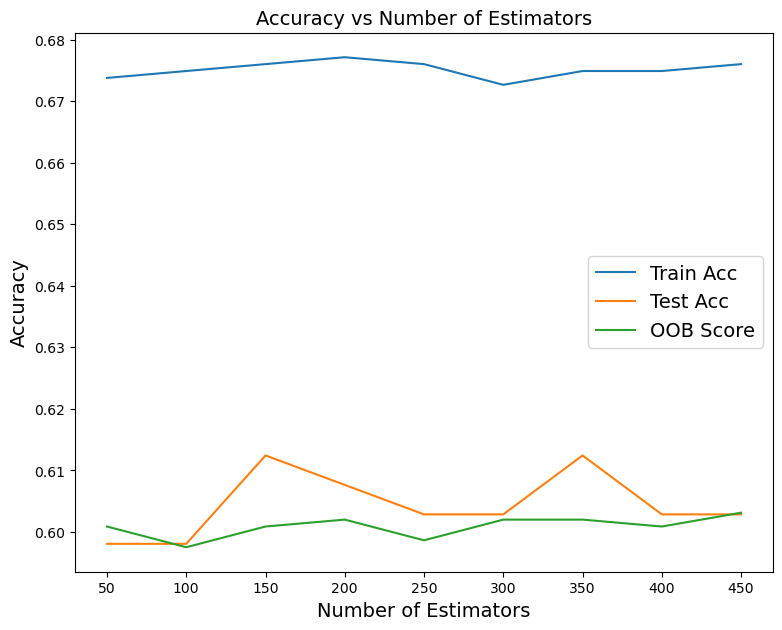

In [75]:
plt.figure(figsize = (9,7))
plt.plot(estim, train_acc, label = 'Train Acc')
plt.plot(estim, test_acc, label = 'Test Acc')
plt.plot(estim, oob_acc, label = 'OOB Score')
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')
plt.show()

## ADA boost classifier

In [76]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=100,
    learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.5933014354066986

### Train Set

Accuracy Score 0.6502242152466368
Classification report: 
              precision    recall  f1-score   support

         0.0       0.65      0.64      0.65       446
         1.0       0.65      0.66      0.65       446

    accuracy                           0.65       892
   macro avg       0.65      0.65      0.65       892
weighted avg       0.65      0.65      0.65       892



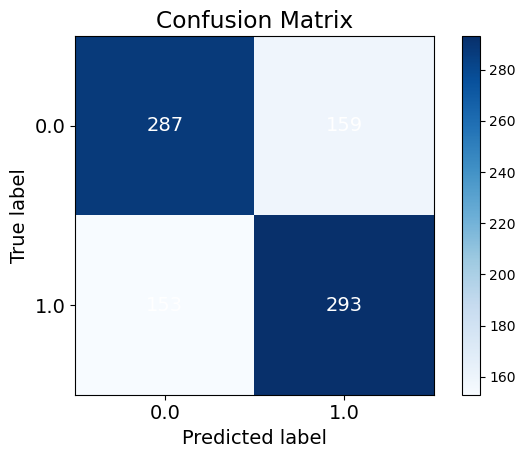

In [77]:
skplt.metrics.plot_confusion_matrix(y_train, ada_clf.predict(X_train));
save_fig('Train Set Confusion Matrix for AdaBoost q2')
print("Accuracy Score {}".format(accuracy_score(y_train, ada_clf.predict(X_train))))
print("Classification report: \n{}".format(classification_report(y_train, ada_clf.predict(X_train))))

### Test Set

Accuracy Score 0.5933014354066986
Classification report: 
              precision    recall  f1-score   support

         0.0       0.69      0.61      0.64       127
         1.0       0.48      0.57      0.53        82

    accuracy                           0.59       209
   macro avg       0.59      0.59      0.58       209
weighted avg       0.61      0.59      0.60       209



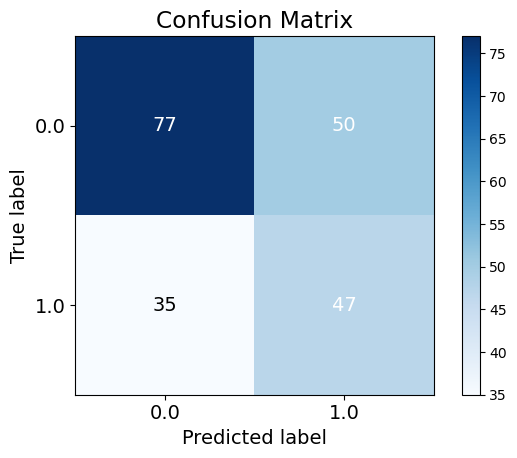

In [78]:
skplt.metrics.plot_confusion_matrix(y_test, ada_clf.predict(X_test));
save_fig('Test Set Confusion Matrix for AdaBoost q2')
print("Accuracy Score {}".format(accuracy_score(y_test, ada_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, ada_clf.predict(X_test))))

In [79]:
import numpy as np
est = np.linspace(1, 500, 2)
train_acc = []
test_acc = []
num_learners = []
for estimators in est:
    ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=int(estimators),
    learning_rate=0.5, random_state=42)
    ada_clf.fit(X_train, y_train)
    y_pred_test = ada_clf.predict(X_test)
    y_pred_train = ada_clf.predict(X_train)
    train_acc.append(accuracy_score(y_train, y_pred_train))
    test_acc.append(accuracy_score(y_test, y_pred_test))
    num_learners.append(estimators)

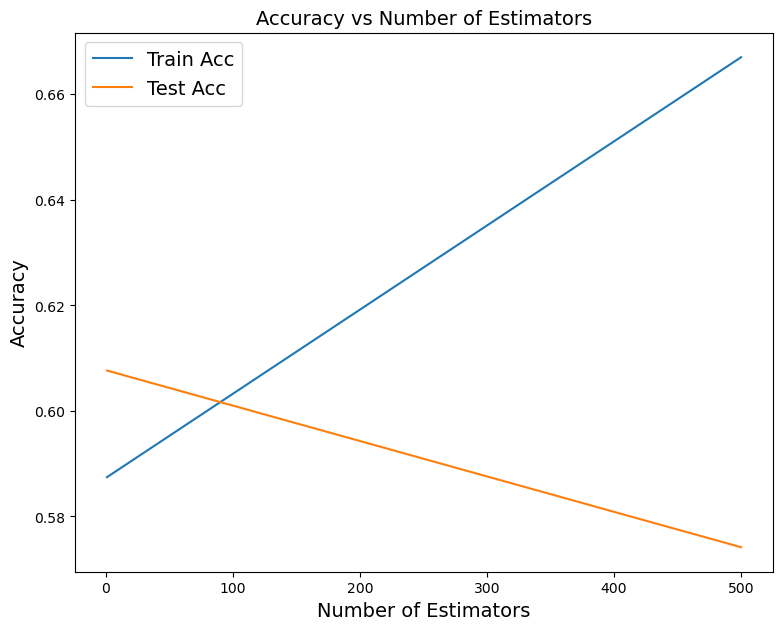

In [80]:
plt.figure(figsize = (9,7))
plt.plot(num_learners, train_acc, label = 'Train Acc')
plt.plot(num_learners, test_acc, label = 'Test Acc')
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')
plt.show()

## XGBoost

#conda install -c conda-forge xgboost

In [81]:
import xgboost as xgb
print (xgb)

<module 'xgboost' from '/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/xgboost/__init__.py'>


In [82]:
xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)

# Score
accuracy_score(y_test, preds)

0.5406698564593302

### Train Set

Accuracy Score 0.874439461883408
Classification report: 
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88       446
         1.0       0.89      0.85      0.87       446

    accuracy                           0.87       892
   macro avg       0.88      0.87      0.87       892
weighted avg       0.88      0.87      0.87       892



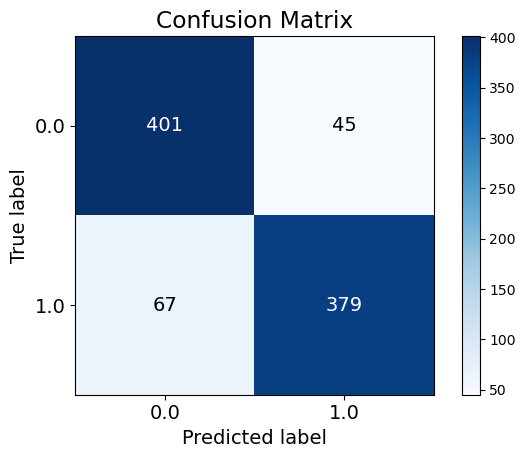

In [83]:
skplt.metrics.plot_confusion_matrix(y_train, xgb_cl.predict(X_train));
save_fig('Train Set Confusion Matrix for XGBoost q2')
print("Accuracy Score {}".format(accuracy_score(y_train, xgb_cl.predict(X_train))))
print("Classification report: \n{}".format(classification_report(y_train, xgb_cl.predict(X_train))))

### Test Set

Accuracy Score 0.5406698564593302
Classification report: 
              precision    recall  f1-score   support

         0.0       0.63      0.58      0.61       127
         1.0       0.42      0.48      0.45        82

    accuracy                           0.54       209
   macro avg       0.53      0.53      0.53       209
weighted avg       0.55      0.54      0.54       209



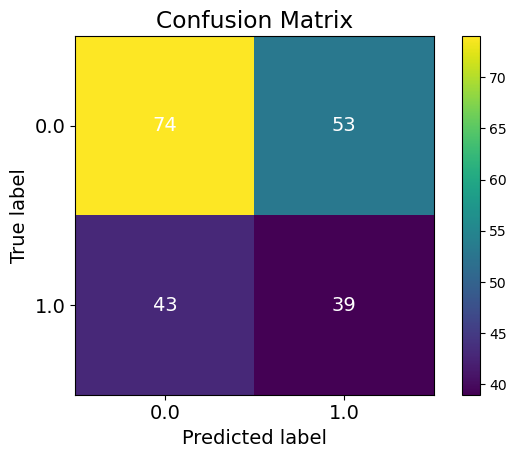

In [84]:
skplt.metrics.plot_confusion_matrix(y_test, xgb_cl.predict(X_test), cmap='viridis');
save_fig('Test Set Confusion Matrix for XGBoost q2')
print("Accuracy Score {}".format(accuracy_score(y_test, xgb_cl.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, xgb_cl.predict(X_test))))

## XAI using LIME

In [85]:
#conda install -c conda-forge ds-lime

In [86]:
from lime.lime_tabular import LimeTabularExplainer

In [87]:
feature_names = X_train.columns
#X_train.columns.values.tolist()

In [88]:
# Create a LimeTabularExplainer object
explainer = LimeTabularExplainer(X_train.values, feature_names=feature_names, class_names=['low', 'high'])


In [89]:
# Select a specific instance from the testing set for explanation
instance_idx = 0
instance = X_test.values[instance_idx]
true_label = y_test[instance_idx]

In [90]:
# Generate explanations using LIME
#Since our accuracy is the highest for Multinomial Naive Bayes, we will be using Multinomial Naive Bayes to interpret 
explanation_lime = explainer.explain_instance(instance, best_grid_rf.predict_proba, num_features=len(feature_names))


/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.05537e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [91]:
# Print the true label and predicted probabilities
print("True Label:", true_label)
print("Predicted Probabilities:", best_grid_rf.predict_proba([instance]))



True Label: 1.0
Predicted Probabilities: [[0.44310754 0.55689246]]


/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [92]:
# Print the top features and their weights in the LIME explanation
print("LIME Explanation:")
for feature, weight in explanation_lime.as_list():
    print(feature, weight)

LIME Explanation:
studytime > 0.33 -0.1294400032208469
paid_yes > 0.00 0.07008053161149287
schoolsup_yes <= 0.00 0.06888509787380358
0.44 < avg_grade <= 0.56 0.06565915262932175
failures <= 0.00 -0.053243238429314776
0.04 < absences <= 0.11 0.028254257889007185
higher_yes <= 1.00 0.0


### Feature Importance Plot

In [93]:
feature_importance = explanation_lime.as_list()

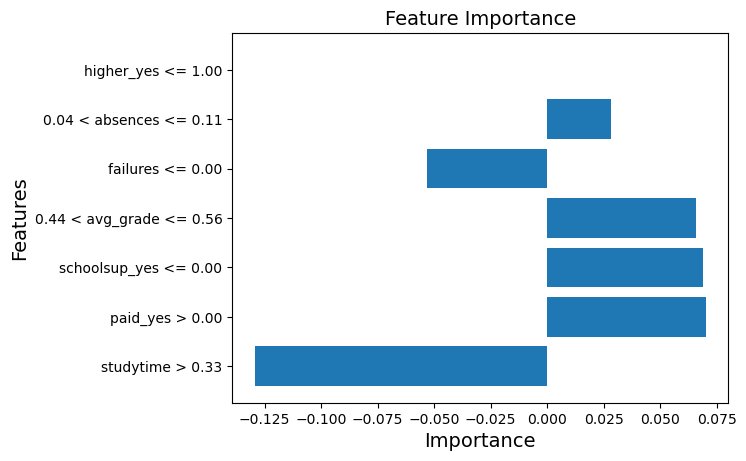

In [94]:
features, values = zip(*feature_importance)
plt.barh(features, values)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.savefig('images/question 2/LIME Feature Importance q2.png')
plt.show()


### LIME Explanation Plot

In [95]:
feature_contributions = explanation_lime.local_exp[1]

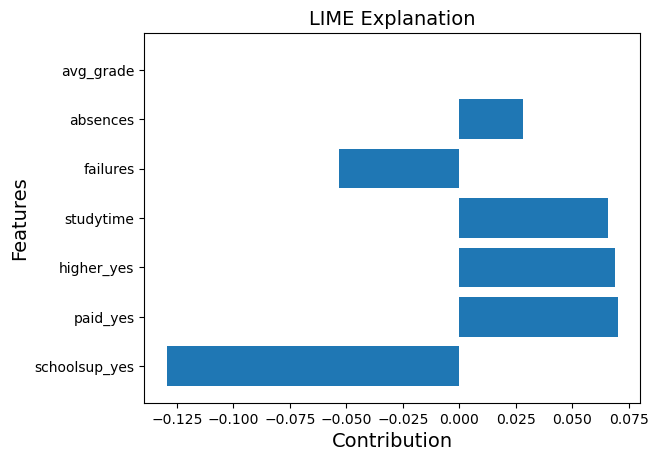

In [96]:
features, contributions = zip(*feature_contributions)
plt.barh(feature_names, contributions)
plt.xlabel('Contribution')
plt.ylabel('Features')
plt.title('LIME Explanation')
plt.savefig('images/question 2/LIME Explanation Graph q2.png')
plt.show()

## Explanation for class 1

In [97]:
#Perform the explanation on the 0th instance in the test data
explaination = explainer.explain_instance(X_test.iloc[0], best_grid_rf.predict_proba)

# show the result of the model's explaination
print('Predicted: ', best_grid_rf.predict(X_test)[0])
print('Actual: ', y_test[0])
explaination.show_in_notebook(show_table = True, show_all = False)
explaination.save_to_file('images/question 2/LIME Prediction Probability for class 1 q2.html')

Predicted:  1.0
Actual:  1.0


/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.3312e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


## Explanation for class 0

In [98]:
#Perform the explanation on the 8th instance in the test data
explaination = explainer.explain_instance(X_test.iloc[8], best_grid_rf.predict_proba)

# show the result of the model's explaination
print('Predicted: ', best_grid_rf.predict(X_test)[8])
print('Actual: ', y_test[8])
explaination.show_in_notebook(show_table = True, show_all = False,)
explaination.save_to_file('images/question 2/LIME Prediction Probability for class 0 q2.html')

Predicted:  0.0
Actual:  0.0


/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.71753e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


# SHAP

In [99]:
import shap
import matplotlib.pyplot as plt

# Create a SHAP explainer
explainer = shap.Explainer(best_grid_rf)

# Calculate SHAP values for the entire dataset
shap_values = explainer.shap_values(X_train)  # Replace "X" with your input data

# Select the desired instance for explanation (index 0 in this example)
instance = X_train.iloc[0]  # Replace "X" with your input data

# Calculate the SHAP values for the selected instance
shap_values_instance = explainer.shap_values(instance)

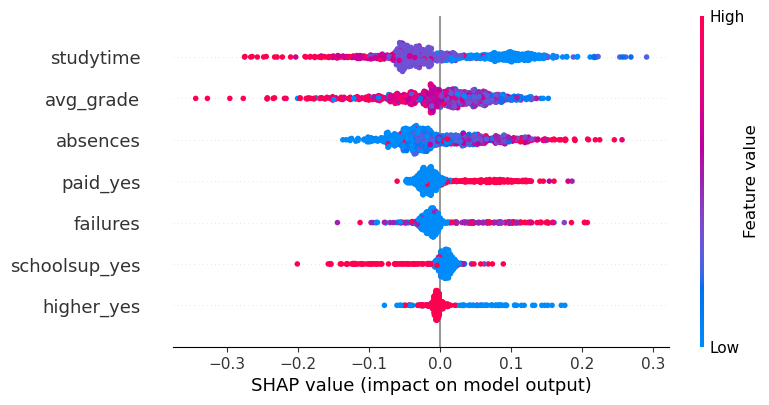

[CV] END break_ties=True, gamma=scale, kernel=rbf, probability=True, random_state=None, shrinking=False; total time=   0.7s
[CV] END break_ties=True, gamma=scale, kernel=rbf, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=True, gamma=scale, kernel=rbf, probability=False, random_state=42, shrinking=True; total time=   0.2s
[CV] END break_ties=True, gamma=scale, kernel=rbf, probability=False, random_state=42, shrinking=False; total time=   0.2s
[CV] END break_ties=True, gamma=scale, kernel=rbf, probability=False, random_state=42, shrinking=False; total time=   0.2s
[CV] END break_ties=True, gamma=scale, kernel=rbf, probability=False, random_state=None, shrinking=True; total time=   0.2s
[CV] END break_ties=True, gamma=scale, kernel=rbf, probability=False, random_state=None, shrinking=True; total time=   0.2s
[CV] END break_ties=True, gamma=scale, kernel=rbf, probability=False, random_state=None, shrinking=True; total time=   0.2s
[CV] END break

[CV] END break_ties=True, gamma=auto, kernel=linear, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, gamma=auto, kernel=linear, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, gamma=auto, kernel=poly, probability=True, random_state=42, shrinking=True; total time=   0.5s
[CV] END break_ties=True, gamma=auto, kernel=poly, probability=True, random_state=42, shrinking=False; total time=   0.5s
[CV] END break_ties=True, gamma=auto, kernel=poly, probability=True, random_state=42, shrinking=False; total time=   0.5s
[CV] END break_ties=True, gamma=auto, kernel=poly, probability=True, random_state=None, shrinking=True; total time=   0.5s
[CV] END break_ties=True, gamma=auto, kernel=poly, probability=True, random_state=None, shrinking=False; total time=   0.6s
[CV] END break_ties=True, gamma=auto, kernel=poly, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END brea

[CV] END break_ties=True, gamma=auto, kernel=poly, probability=True, random_state=42, shrinking=True; total time=   0.5s
[CV] END break_ties=True, gamma=auto, kernel=poly, probability=True, random_state=42, shrinking=True; total time=   0.5s
[CV] END break_ties=True, gamma=auto, kernel=poly, probability=True, random_state=42, shrinking=False; total time=   0.5s
[CV] END break_ties=True, gamma=auto, kernel=poly, probability=True, random_state=None, shrinking=True; total time=   0.5s
[CV] END break_ties=True, gamma=auto, kernel=poly, probability=True, random_state=None, shrinking=False; total time=   0.6s
[CV] END break_ties=True, gamma=auto, kernel=poly, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=True, gamma=auto, kernel=poly, probability=False, random_state=42, shrinking=True; total time=   0.2s
[CV] END break_ties=True, gamma=auto, kernel=poly, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=Tr

[CV] END break_ties=True, gamma=scale, kernel=linear, probability=True, random_state=None, shrinking=True; total time=   0.4s
[CV] END break_ties=True, gamma=scale, kernel=linear, probability=True, random_state=None, shrinking=False; total time=   0.4s
[CV] END break_ties=True, gamma=scale, kernel=linear, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=True, gamma=scale, kernel=linear, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=True, gamma=scale, kernel=linear, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=True, gamma=scale, kernel=linear, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, gamma=scale, kernel=linear, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, gamma=scale, kernel=linear, probability=False, random_state=None, shrinking=False; total t

[CV] END break_ties=False, gamma=scale, kernel=poly, probability=True, random_state=None, shrinking=True; total time=   0.5s
[CV] END break_ties=False, gamma=scale, kernel=poly, probability=True, random_state=None, shrinking=False; total time=   0.5s
[CV] END break_ties=False, gamma=scale, kernel=poly, probability=False, random_state=42, shrinking=True; total time=   0.2s
[CV] END break_ties=False, gamma=scale, kernel=poly, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=False, gamma=scale, kernel=poly, probability=False, random_state=None, shrinking=True; total time=   0.2s
[CV] END break_ties=False, gamma=scale, kernel=poly, probability=False, random_state=None, shrinking=True; total time=   0.2s
[CV] END break_ties=False, gamma=scale, kernel=poly, probability=False, random_state=None, shrinking=False; total time=   0.2s
[CV] END break_ties=False, gamma=scale, kernel=rbf, probability=True, random_state=42, shrinking=True; total time=   0.9s

In [100]:
from shap.plots import beeswarm
beeswarm(explainer(X_train)[:,:,1], show=False)
plt.savefig('images/question 2/beeswarm_plot.png',dpi=300, bbox_inches= 'tight')